# 🤒 Claimext - FEVER Conf notes

In [1]:
import datasets, transformers, bert_score, pandas as pd, os, seaborn as sns
from utils.dbutils import *
from utils.datautils import *
from IPython.display import HTML, display
import pickle
import tensorflow as tf
tf.random.set_seed(111)
pd.set_option('display.max_colwidth', 100) 

In [2]:
pd.set_option("display.precision", 2)
def display(df):
    """Display a dataframe with vertical column headers"""
    styles = [dict(selector="th", props=[('width', '40px')]),
              dict(selector="th.col_heading",
                   props=[('text-align', 'left'), 
                          ("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'), 
                          ('height', '290px'),
                          ('vertical-align', 'bottom')])]                   
    return (df.fillna('').style.set_table_styles(styles).background_gradient(cmap="Blues"))


## 🧮 Precompute values

In [3]:
preds = {}
PATH = "/home/ullriher/ullriher/models/claimext23"
PRED_FILE = "generated_predictions.txt"
models = []
for dirpath, dirnames, filenames in os.walk(PATH):
    if PRED_FILE in filenames:
        models.append(dirpath.split("/")[-1])

In [4]:
preds["text"] = texts = [". ".join(datapoint["source_sentences"]) + ". "+ datapoint["text"] for datapoint in load_jsonl("/mnt/data/factcheck/claim_extraction/csfeversum/en/0.0.2/test.jsonl")]
preds["gold"] = claims = [p["claim"] for p in load_jsonl("/mnt/data/factcheck/claim_extraction/csfeversum/en/0.0.2/test.jsonl")]


In [5]:
for model in models:
    with open(f"{PATH}/{model}/{PRED_FILE}") as f:
        preds[model] = []
        for line in f:
            preds[model].append(line.strip())
        if len(preds[model])==0 or len(preds[model][0])==0:
            preds.pop(model)
        if model not in preds:
            models.remove(model)

In [6]:
df=pd.DataFrame.from_dict(preds,orient='index').transpose()

In [7]:
df.sample(5)

,text,gold,pegasus-xsum_feversum_text2claim_bs4_ep30,bart-large-cnn_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs16_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs16_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs2_ep30,...,pegasus-xsum_feversum3_text2claim_bs12_ep2,distilbart-xsum-12-3_feversum_text2claim_bs8_ep10,t5-large-finetuned-xsum_feversum_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep10,t5-large-finetuned-xsum-cnn_feversum_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum3_text2claim_bs4_ep30,bart-large-cnn_feversum_text2claim_bs2_ep30
1708,Films. The film stars Jonathan Mason and was distributed by Roadside Attractions and released in...,Michelle Williams made her feature film debut in Lassie.,Lassie was filmed in Ireland.,"Lassie (2005 film) was filmed in the UK with Peter Dinklage. amongst the residents of Lassie, C...",Lassie (2005 film) was filmed in Scotland.,Lassie was filmed in Scotland.,Lassie (film) was directed by a British-American-French-Irish film director and producer born on...,Lassie was directed by Charles Sturridge.,Lassie (film) was released in the UK by Roadside Attractions. The film was distributed by Roadsi...,"The film Lassie Come-Home, which stars Joe Carraclough and his collie, has been released in the UK.",...,Lassie (film) was directed by Charles Sturridge.,Peter Dinklage was in the film Lassie.,"The film Lassie Come-Home, which stars Joe Carraclough and his collie, has been released in the UK.",Lassie Smith was born in Lassie.,Chris Carter rose to fame in the early 1990s.,The film Lassie is a British-American comedy film about a man and his dog.,Lassie was released in the UK in 2005.,Lassie (film) was filmed in a sovereign state on the north-east coast of the United Kingdom. The...,Lassie was released in the UK in 2005.,Lassie is a film based on a book written by Larry Buttrose and his brother Peter Dinklage; The N...
4029,"Rapson, included a 1,441-seat thrust stage designed by Tanya Moiseiwitsch, and was operated from...",The Guthrie Theater's first building began operating in 1963.,The Guthrie Theater is in Minneapolis.,Kaitlin Olson started her career in the Guthrie Theater of the Wells in 2002; The Guild of Paint...,Guthrie Theater was operated by Tanya Moiseiwitsch.,Minneapolis had multiple debates to build a theater.,The Guthrie Theater's first building was designed by an American architect and designer from New...,The Guthrie Theater was designed by Tanya Moiseiwitsch.,Minneapolis's Guthrie Theater was awarded a Tony for Best Featured Actor in a Musical.''This is ...,"The Guthrie Theater, which was founded in the 1960s, has been closed for the season.",...,The Guthrie Theater was designed by Ralph Rapson.,The Guthrie Theater is a center for professional training.,"The Guthrie Theater, which was founded in the 1960s, has been closed for the season.",The Guthrie Theater was founded in 1963.,Chris Carter rose to fame in the early 1990s.,The Guthrie Theater is a regional theater in the United States.,The Guthrie Theater is in the United States.,Katrina Redden was in a play written by Eugene O'Neill and Jack O'Neill. O'Neill was nominated f...,The Guthrie Theater was designed by Tanya Moiseiwitsch.,Tanya Guthrie Theater is in a performing arts conservatory; The Westside of the Guthrie Hall of ...
4773,Weeds is an American dark comedy drama television series created by Jenji Kohan for Showtime. It...,Matthew Modine played the character Sullivan Groff.,Weeds is a television show.,Jennifer Grey is in Herringo Oruvan-Lizzy Caplan starred in television show like Weeds establish...,Weeds is a dark comedy drama series.,Weeds is a television show.,Weeds (TV

In [8]:
df.sample(2)

,text,gold,pegasus-xsum_feversum_text2claim_bs4_ep30,bart-large-cnn_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs16_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs16_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs2_ep30,...,pegasus-xsum_feversum3_text2claim_bs12_ep2,distilbart-xsum-12-3_feversum_text2claim_bs8_ep10,t5-large-finetuned-xsum_feversum_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep10,t5-large-finetuned-xsum-cnn_feversum_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum3_text2claim_bs4_ep30,bart-large-cnn_feversum_text2claim_bs2_ep30
3359,1994). Since then he has appeared in numerous films in his native Scandinavia and Europe in gene...,Nikolaj Coster-Waldau was in a Danish thriller film.,Nikolaj Coster-Waldau is a producer.,"Danny Coster-Waldau was born in July 27, 1970; A Thousand Times Good Night Lights-Waverlyau-WCFr...",Konidela Production Company was established by an actor.,Nikolaj Coster-Waldau is Danish.,Nikolaj Coster-Waldau has appeared in Headhunters (2011) and A Thousand Times Good Night (2013)....,Nikola Coster-Waldau is Danish.,Nikolaj Coster-Waldau has acted in films directed by Gilles Paquet-Brenner and Frédéric Auguste ...,"Actor Nikolaj Coster-Waldau, who was born in Denmark in the 1960s, has been credited with the ro...",...,Nikolaj Coster-Waldau is an actor.,Nikolaj Coster-Waldau is an actor.,"Actor Nikolaj Coster-Waldau, who was born in Denmark in the 1960s, has been credited with the ro...",Konidela Production Company was established by Nikolaj Coster-Waldau.,Chris Carter rose to fame in the early 1990s.,Actor Nikolaj Coster-Waldau is a Danish actor who has appeared in several films and television s...,Nikolaj Coster-Waldau is an actor.,Nikolaj Coster-Waldau acted in a 2001 British comedy film. The first film appearance of Nikolaj ...,Nikola Coster-Waldau is Danish.,Nikolaj Coster-Waldau is a screenwriter for the HBO series A Thousand Times Good Night (TCF) was...
2262,"signed a three-album solo recording deal with Columbia Records, the same label behind One Direct...",Harry Styles made his acting debut in 2017.,Harry Styles is a singer.,Harry Styles is a singer-songwriter.Lily Collinsa was on the list of highest earning celebrities...,Harry Styles signed a three-album solo recording deal.,Harry Styles is an English songwriter.,One Direction's Harry Styles has a solo debut album called Harry Styles: A Man Walks on to a Pit...,Harry Styles will make his acting debut in July 2017.,Harry Styles signed a three-album solo recording deal with the same label as One Direction. The ...,Harry Edward Styles has been named as a solo artist in the UK.,...,Harry Styles is a singer.,Harry Styles appeared on a British television series.,Harry Edward Styles has been named as a solo artist in the UK.,Harry Styles was on the X Factor.,Chris Carter rose to fame in the early 1990s.,Harry Styles is a British singer and songwriter who has released four albums.,Harry Styles was born on February 1.,Harry Styles will make his acting debut in a July 2017 film. He'll be directed by Belgian film d...,Harry Styles auditioned for a British television series.,Harry Styles was on a boy competition show created by a British singer and songwriter for the sa...


In [9]:
P, R, F = {}, {}, {}
with open('data/pickle/claimext/roberta_gold_claim.pickle','rb') as f:
    P, R, F = pickle.load(f)

In [10]:
for model_ in preds.keys():
    try:
        if model_ not in F:
            P[model_],R[model_],F[model_] = [[float(el) for el in vec] for vec in bert_score.score(preds[model_], claims, model_type="roberta-base")]
            with open('data/pickle/claimext/roberta_gold_claim.pickle', 'wb') as f:
                pickle.dump((P,R,F), f)
    except AssertionError:
        pass

In [11]:
P2, R2, F2 = {}, {}, {}
with open('data/pickle/claimext/roberta_text.pickle','rb') as f:
    P2, R2, F2 = pickle.load(f)
    
for model_ in preds.keys():
    try:
        if model_ not in F2:
            P2[model_],R2[model_],F2[model_] = [[float(el) for el in vec] for vec in bert_score.score(preds[model_], texts, model_type="roberta-base")]
            with open('data/pickle/claimext/roberta_text.pickle', 'wb') as f:
                pickle.dump((P2,R2,F2), f)
    except AssertionError:
        pass

In [12]:
P_df=pd.DataFrame.from_dict(P,orient='index').transpose()
R_df=pd.DataFrame.from_dict(R,orient='index').transpose()
F_df=pd.DataFrame.from_dict(F,orient='index').transpose()

In [13]:
P2_df=pd.DataFrame.from_dict(P2,orient='index').transpose()
R2_df=pd.DataFrame.from_dict(R2,orient='index').transpose()
F2_df=pd.DataFrame.from_dict(F2,orient='index').transpose()

In [14]:
display(F_df.sample(10))

,text,gold,pegasus-xsum_feversum_text2claim_bs4_ep30,bart-large-cnn_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs16_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs16_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum_text2claim_bs8_ep24,distilbart-xsum-12-3_feversum_text2claim_bs4_ep10,t5-large-finetuned-xsum_feversum3_text2claim_bs4_ep30,pegasus-xsum_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep24,t5-large-finetuned-xsum-cnn_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep24,distilbart-xsum-12-3_feversum_text2claim_bs4_ep24,pegasus-cnn_dailymail_feversum_text2claim_bs4_ep30,t5-large-finetuned-xsum_feversum_text2claim_bs2_ep30,t5-small-finetuned-xsum_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs8_ep30,bart-large-xsum_feversum_text2claim_bs4_ep2,pegasus-cnn_dailymail_feversum_text2claim_bs8_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs8_ep30,bart-large-xsum_feversum_text2claim_bs8_ep10,t5-small-finetuned-xsum_feversum_text2claim_bs2_ep30,pegasus-cnn_dailymail_feversum_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs12_ep10,distilbart-xsum-12-3_feversum_text2claim_bs8,distilbart-xsum-12-3_feversum_text2claim_bs4_ep2,pegasus-xsum_feversum3_text2claim_bs12_ep2,distilbart-xsum-12-3_feversum_text2claim_bs8_ep10,t5-large-finetuned-xsum_feversum_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep10,t5-large-finetuned-xsum-cnn_feversum_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum3_text2claim_bs4_ep30,bart-large-cnn_feversum_text2claim_bs2_ep30
3160,0.82,1.00,0.91,0.86,0.91,0.92,0.86,0.91,0.87,0.89,0.89,0.86,0.88,0.91,0.91,0.89,0.91,0.87,0.88,0.88,0.82,0.87,0.89,0.92,0.91,0.90,0.87,0.89,0.91,0.91,0.87,0.91,0.91,0.91,0.90,0.88,0.89,0.92,0.85,0.89,0.91,0.88,0.92,0.86
4523,0.79,1.00,0.98,0.86,0.86,0.93,0.89,0.93,0.90,0.88,0.94,0.88,0.88,0.95,0.90,0.88,0.98,0.85,0.92,0.97,0.86,0.88,0.87,0.98,0.92,0.97,0.90,0.88,0.94,0.98,0.90,0.95,0.91,0.94,0.90,0.94,0.88,0.96,0.89,0.90,0.92,0.90,0.90,0.85
1997,0.79,1.00,0.96,0.87,0.89,0.96,0.89,0.95,0.88,0.89,0.94,0.88,0.88,0.93,0.94,0.89,0.96,0.84,0.89,0.93,0.85,0.88,0.90,0.96,0.95,0.97,0.89,0.89,0.94,0.87,0.88,0.92,0.94,0.94,0.97,0.94,0.89,0.92,0.86,0.92,0.97,0.88,0.96,0.87
4841,0.84,1.00,0.97,0.87,0.96,0.96,0.89,0.95,0.85,0.93,0.96,0.90,0.89,0.95,0.96,0.93,0.97,0.86,0.93,0.98,0.84,0.90,0.92,0.94,0.95,0.97,0.90,0.93,0.98,0.96,0.85,0.97,0.97,0.97,0.92,0.95,0.93,0.95,0.86,0.93,0.96,0.92,0.95,0.87
1317,0.79,1.00,0.93,0.83,0.88,0.87,0.86,0.88,0.86,0.87,0.88,0.86,0.86,0.88,0.87,0.87,0.93,0.85,0.86,0.86,0.81,0.86,0.88,0.86,0.86,1.00,0.87,0.87,1.00,0.90,0.86,0.88,0.87,0.87,0.87,0.87,0.87,0.84,0.84,0.87,0.87,0.87,0.86,0.84
578,0.78,1.00,0.87,0.84,0.88,0.90,0.86,0.88,0.86,0.86,0.88,0.85,0.85,0.88,0.88,0.86,0.87,0.84,0.85,0.88,0.83,0.85,0.85,0.87,0.89,0.88,0.84,0.86,0.86,0.87,0.86,0.89,0.87,0.88,0.88,0.87,0.86,0.89,0.86,0.86,0.88,0.86,0.88,0.84
336,0.80,1.00,0.98,0.87,1.00,0.97,0.89,0.94,0.91,0.88,0.97,0.85,0.86,0.93,0.98,0.88,0.98,0.82,0.91,0.93,0.81,0.89,0.88,0.92,0.94,0.97,0.91,0.88,0.97,0.94,0.91,0.88,0.94,0.96,0.92,0.97,0.88,0.95,0.85,0.90,0.98,0.92,0.96,0.89
1843,0.78,1.00,0.93,0.86,0.89,0.88,0.87,0.88,0.86,0.86,0.91,0.86,0.84,0.87,0.87,0.86,0.93,0.84,0.89,0.87,0.84,0.87,0.87,0.93,0.89,0.87,0.87,0.86,0.90,0.93,0.86,0.89,0.87,0.91,0.89,0.87,0.86,0.87,0.86,0.91,0.91,0.82,0.91,0.86
972,0.80,1.00,0.91,0.86,0.91,0.98,0.87,0.89,0.88,0.89,0.91,0.86,0.88,0.93,0.91,0.89,0.91,0.82,0.90,0.84,

In [15]:
display(P2_df.sample(10))

,text,gold,pegasus-xsum_feversum_text2claim_bs4_ep30,bart-large-cnn_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs16_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs16_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum_text2claim_bs8_ep24,distilbart-xsum-12-3_feversum_text2claim_bs4_ep10,t5-large-finetuned-xsum_feversum3_text2claim_bs4_ep30,pegasus-xsum_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep24,t5-large-finetuned-xsum-cnn_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep24,distilbart-xsum-12-3_feversum_text2claim_bs4_ep24,pegasus-cnn_dailymail_feversum_text2claim_bs4_ep30,t5-large-finetuned-xsum_feversum_text2claim_bs2_ep30,t5-small-finetuned-xsum_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs8_ep30,bart-large-xsum_feversum_text2claim_bs4_ep2,pegasus-cnn_dailymail_feversum_text2claim_bs8_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs8_ep30,bart-large-xsum_feversum_text2claim_bs8_ep10,t5-small-finetuned-xsum_feversum_text2claim_bs2_ep30,pegasus-cnn_dailymail_feversum_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs12_ep10,distilbart-xsum-12-3_feversum_text2claim_bs8,distilbart-xsum-12-3_feversum_text2claim_bs4_ep2,pegasus-xsum_feversum3_text2claim_bs12_ep2,distilbart-xsum-12-3_feversum_text2claim_bs8_ep10,t5-large-finetuned-xsum_feversum_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep10,t5-large-finetuned-xsum-cnn_feversum_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum3_text2claim_bs4_ep30,bart-large-cnn_feversum_text2claim_bs2_ep30
1155,1.00,0.90,0.93,0.84,0.91,0.95,0.94,0.91,0.93,0.90,0.88,0.94,0.86,0.88,0.86,0.90,0.93,0.83,0.88,0.88,0.79,0.85,0.89,0.95,0.95,0.91,0.90,0.90,0.88,0.91,0.93,0.95,0.88,0.88,0.94,0.91,0.90,0.94,0.85,0.88,0.89,0.92,0.95,0.84
404,1.00,0.93,0.94,0.85,0.93,0.93,0.90,0.93,0.92,0.87,0.90,0.95,0.90,0.93,0.93,0.87,0.94,0.79,0.88,0.93,0.78,0.89,0.85,0.94,0.92,0.90,0.89,0.87,0.93,0.94,0.92,0.92,0.91,0.93,0.94,0.93,0.87,0.93,0.83,0.90,0.93,0.93,0.93,0.84
4589,1.00,0.94,0.92,0.80,0.92,0.92,0.91,0.92,0.92,0.89,0.92,0.91,0.91,0.94,0.92,0.89,0.92,0.80,0.96,0.92,0.81,0.90,0.87,0.94,0.92,0.92,0.88,0.89,0.92,0.94,0.92,0.92,0.92,0.92,0.92,0.92,0.89,0.92,0.84,0.96,0.92,0.91,0.91,0.81
1550,1.00,0.89,0.93,0.82,0.93,0.88,0.94,0.93,0.86,0.82,0.87,0.94,0.85,0.87,0.88,0.82,0.93,0.82,0.89,0.87,0.78,0.87,0.84,0.90,0.93,0.87,0.87,0.82,0.90,0.87,0.86,0.88,0.93,0.89,0.93,0.89,0.82,0.93,0.83,0.91,0.87,0.89,0.92,0.80
2731,1.00,0.88,0.89,0.80,0.89,0.89,0.90,0.89,0.89,0.86,0.87,0.90,0.91,0.88,0.90,0.86,0.89,0.84,0.91,0.89,0.78,0.86,0.87,0.92,0.89,0.89,0.85,0.86,0.89,0.90,0.89,0.90,0.89,0.91,0.89,0.89,0.86,0.89,0.83,0.89,0.89,0.89,0.84,0.80
3359,1.00,0.86,0.87,0.82,0.81,0.87,0.89,0.88,0.82,0.84,0.87,0.86,0.89,0.87,0.87,0.84,0.87,0.82,0.87,0.87,0.77,0.87,0.85,0.87,0.81,0.87,0.87,0.84,0.87,0.88,0.82,0.86,0.87,0.87,0.87,0.87,0.84,0.85,0.82,0.89,0.87,0.88,0.88,0.81
1700,1.00,0.90,0.91,0.83,0.91,0.93,0.89,0.89,0.91,0.84,0.91,0.90,0.84,0.90,0.94,0.84,0.91,0.80,0.92,0.93,0.79,0.85,0.88,0.89,0.94,0.91,0.89,0.84,0.93,0.93,0.91,0.91,0.91,0.91,0.91,0.85,0.84,0.93,0.83,0.89,0.93,0.83,0.93,0.81
3936,1.00,0.90,0.91,0.84,0.94,0.94,0.94,0.95,0.90,0.90,0.89,0.94,0.86,0.89,0.95,0.90,0.91,0.77,0.90,0.94,0.76,0.94,0.83,0.95,0.95,0.94,0.94,0.90,0.92,0.94,0.90,0.94,0.94,0.94,0.94,0.89,0.90,0.94,0.82,0.86,0.92,0.89,0.94,0.85
547,1.00,0.88,0.88,0.80,0.86,0.88,0.82,0.88,0.90,0.88,0.88,0.90,0.87,0.88,0.88,0.88,0.88,0.81,0.87,0.87

In [16]:
display(F2_df.sample(10))

,text,gold,pegasus-xsum_feversum_text2claim_bs4_ep30,bart-large-cnn_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs16_ep30,pegasus-cnn_dailymail_feversum3_text2claim_bs16_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs8_ep30,pegasus-cnn_dailymail_feversum_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum_text2claim_bs8_ep24,distilbart-xsum-12-3_feversum_text2claim_bs4_ep10,t5-large-finetuned-xsum_feversum3_text2claim_bs4_ep30,pegasus-xsum_feversum3_text2claim_bs4_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep24,t5-large-finetuned-xsum-cnn_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep24,distilbart-xsum-12-3_feversum_text2claim_bs4_ep24,pegasus-cnn_dailymail_feversum_text2claim_bs4_ep30,t5-large-finetuned-xsum_feversum_text2claim_bs2_ep30,t5-small-finetuned-xsum_feversum3_text2claim_bs2_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs8_ep30,bart-large-xsum_feversum_text2claim_bs4_ep2,pegasus-cnn_dailymail_feversum_text2claim_bs8_ep30,t5-large-finetuned-xsum_feversum3_text2claim_bs8_ep30,bart-large-xsum_feversum_text2claim_bs8_ep10,t5-small-finetuned-xsum_feversum_text2claim_bs2_ep30,pegasus-cnn_dailymail_feversum_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum3_text2claim_bs12_ep10,distilbart-xsum-12-3_feversum_text2claim_bs8,distilbart-xsum-12-3_feversum_text2claim_bs4_ep2,pegasus-xsum_feversum3_text2claim_bs12_ep2,distilbart-xsum-12-3_feversum_text2claim_bs8_ep10,t5-large-finetuned-xsum_feversum_text2claim_bs4_ep30,bart-large-xsum_feversum3_text2claim_bs16_ep30,distilbart-xsum-12-3_feversum_text2claim_bs2_ep10,t5-large-finetuned-xsum-cnn_feversum_text2claim_bs2_ep30,bart-large-xsum_feversum_text2claim_bs8_ep2,pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30,bart-large-xsum_feversum3_text2claim_bs4_ep30,bart-large-cnn_feversum_text2claim_bs2_ep30
1108,1.00,0.82,0.82,0.80,0.82,0.83,0.84,0.82,0.82,0.80,0.81,0.84,0.81,0.78,0.80,0.80,0.82,0.73,0.82,0.80,0.73,0.83,0.80,0.82,0.82,0.82,0.83,0.80,0.78,0.82,0.82,0.82,0.80,0.82,0.82,0.80,0.80,0.80,0.76,0.82,0.82,0.84,0.82,0.79
2842,1.00,0.83,0.82,0.79,0.80,0.79,0.83,0.82,0.84,0.82,0.82,0.85,0.81,0.81,0.82,0.82,0.82,0.73,0.82,0.81,0.73,0.82,0.82,0.82,0.82,0.80,0.77,0.82,0.82,0.81,0.84,0.82,0.82,0.79,0.83,0.82,0.82,0.74,0.76,0.82,0.83,0.84,0.83,0.77
4035,1.00,0.83,0.82,0.77,0.80,0.83,0.81,0.82,0.81,0.81,0.82,0.86,0.80,0.79,0.81,0.81,0.82,0.78,0.82,0.81,0.75,0.82,0.81,0.84,0.83,0.83,0.82,0.81,0.80,0.82,0.81,0.83,0.83,0.83,0.82,0.83,0.81,0.81,0.78,0.81,0.80,0.87,0.76,0.78
2497,1.00,0.80,0.81,0.78,0.81,0.81,0.83,0.80,0.82,0.81,0.81,0.83,0.83,0.81,0.82,0.81,0.81,0.76,0.81,0.79,0.73,0.83,0.81,0.81,0.82,0.81,0.82,0.81,0.80,0.82,0.82,0.81,0.82,0.81,0.81,0.82,0.81,0.81,0.76,0.81,0.81,0.81,0.79,0.77
4258,1.00,0.80,0.77,0.77,0.80,0.79,0.78,0.80,0.79,0.78,0.80,0.81,0.80,0.80,0.79,0.78,0.77,0.77,0.80,0.79,0.74,0.80,0.78,0.81,0.80,0.81,0.78,0.78,0.80,0.81,0.79,0.80,0.80,0.80,0.80,0.79,0.78,0.79,0.77,0.80,0.81,0.80,0.79,0.75
4966,1.00,0.81,0.81,0.81,0.81,0.80,0.83,0.80,0.81,0.79,0.81,0.84,0.84,0.81,0.80,0.79,0.81,0.74,0.83,0.81,0.74,0.83,0.79,0.81,0.80,0.81,0.80,0.79,0.81,0.81,0.81,0.79,0.81,0.81,0.79,0.79,0.79,0.81,0.77,0.82,0.81,0.84,0.81,0.78
591,1.00,0.80,0.82,0.78,0.78,0.81,0.83,0.83,0.84,0.78,0.82,0.83,0.84,0.78,0.78,0.78,0.82,0.76,0.83,0.83,0.74,0.84,0.78,0.83,0.77,0.82,0.85,0.78,0.78,0.83,0.84,0.78,0.83,0.82,0.82,0.78,0.78,0.80,0.76,0.82,0.82,0.82,0.77,0.78
354,1.00,0.83,0.82,0.79,0.81,0.82,0.80,0.80,0.82,0.82,0.81,0.81,0.78,0.81,0.82,0.82,0.82,0.75,0.79,0.83,0.75,0.82,0.82,0.82,0.82,0.82,0.79,0.82,0.81,0.81,0.82,0.79,0.79,0.82,0.82,0.80,0.82,0.82,0.77,0.81,0.82,0.80,0.82,0.77
1025,1.00,0.83,0.83,0.79,0.84,0.83,0.82,0.84,0.87,0.83,0.82,0.85,0.86,0.82,0.84,0.83,0.83,0.79,0.87,0.82

### 🕵🏻 Examine prediction

In [17]:
examine_claim, examine_model = 1286, "distilbart-xsum-12-3_feversum_text2claim_bs4_ep2"
texts[examine_claim], claims[examine_claim], preds[examine_model][examine_claim]

('Hot Tub Time Machine 2 is a 2015 American comedy film directed by Steve Pink and written by Josh Heald. The film stars Rob Corddry, Craig Robinson, Clark Duke, Adam Scott, Chevy Chase, and Gillian Jacobs. It is the sequel to the 2010. $ 13 million against its $ 14 million budget and has a 14 % approval rating on Rotten Tomatoes. Hot Tub Time Machine 2 is a 2015 American comedy film directed by Steve Pink and written by Josh Heald. The film stars Rob Corddry, Craig Robinson,. Hot Tub Time Machine 2 is a 2015 American comedy film directed by Steve Pink and written by Josh Heald. The film stars Rob Corddry, Craig Robinson, Clark Duke, Adam Scott, Chevy Chase, and Gillian Jacobs. It is the sequel to the 2010 film Hot Tub Time Machine. The film was released on February 20, 2015. John Cusack, who played Adam Yates and produced the first film, does not return in the theatrical cut, but has a brief cameo in the unrated version. The film grossed $ 13 million against its $ 14 million budget an

In [18]:
examine_claim, examine_model = 759, "t5-large-finetuned-xsum-cnn_feversum3_text2claim_bs2_ep30"
texts[examine_claim], claims[examine_claim], preds[examine_model][examine_claim]

('Tommy Brown. "A Little More" is a song by American hip hop recording artist Machine Gun Kelly. The song was released on March 6, 2015 as the second single from his second studio album General Admission. The single features vocals from Victoria Monet and. "A Little More" is a song by American hip hop recording artist Machine Gun Kelly. The song was released on March 6, 2015 as the second single from his second studio album General Admission. The single features vocals from Victoria Monet and was produced by. "A Little More" is a song by American hip hop recording artist Machine Gun Kelly. The song was released on March 6, 2015 as the second single from his second studio album General Admission. The single features vocals from Victoria Monet and was produced by Tommy Brown. ',
 'Machine Gun Kelly released A Little More.',
 'Machine Gun Kelly\'s "A Little More" is a song by American hip hop recording artist Machine Gun Kelly.')

### ⛪️ Faithfulness
**TODO: Today**


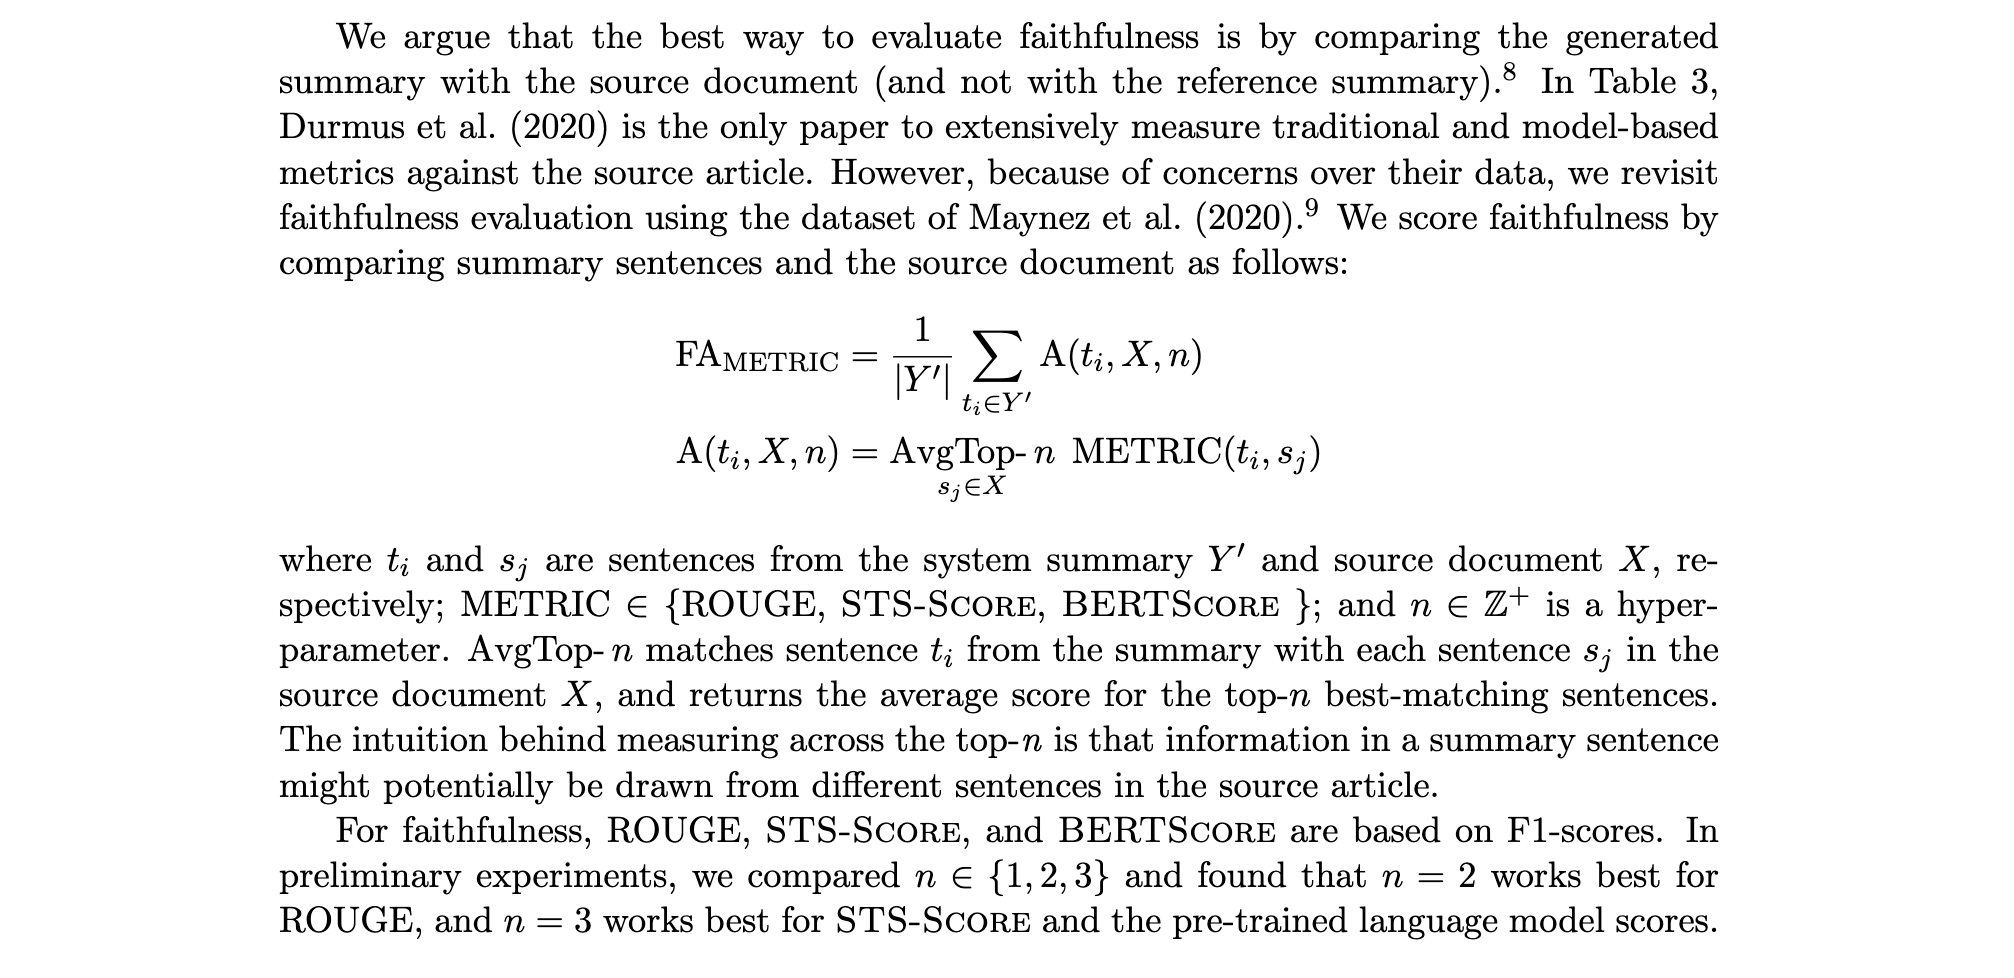

### 🧘🏻‍♂️ Focus (& Coverage)

**Todo: weekend - na coverage se vysrat, chceme jednu větu.**

❗️ Focus bude zajímavý, říká jestli **jsou konzistentní QA odpovědi na otázku inspirovanou pred, pokud odpovídáme pomocí pred i pomocí gold sumáře**


## 🗂️ Experiment Results

In [19]:
P2_df.mean(axis=0).sort_values(ascending=False)

text                                                         1.00
t5-small-finetuned-xsum_feversum3_text2claim_bs2_ep30        0.91
pegasus-xsum_feversum3_text2claim_bs12_ep2                   0.91
t5-small-finetuned-xsum_feversum_text2claim_bs2_ep30         0.90
t5-large-finetuned-xsum-cnn_feversum3_text2claim_bs2_ep30    0.90
distilbart-xsum-12-3_feversum3_text2claim_bs12_ep10          0.90
pegasus-cnn_dailymail_feversum3_text2claim_bs8_ep30          0.90
pegasus-xsum_feversum3_text2claim_bs4_ep30                   0.90
pegasus-xsum_feversum_text2claim_bs4_ep30                    0.90
bart-large-xsum_feversum3_text2claim_bs16_ep30               0.90
bart-large-xsum_feversum_text2claim_bs8_ep2                  0.90
bart-large-xsum_feversum_text2claim_bs4_ep2                  0.90
distilbart-xsum-12-3_feversum_text2claim_bs8                 0.89
bart-large-xsum_feversum3_text2claim_bs8_ep30                0.89
distilbart-xsum-12-3_feversum_text2claim_bs4_ep2             0.89
distilbart

In [20]:
R2_df.mean(axis=0).sort_values(ascending=False).head(6)

text                                                   1.00
pegasus-cnn_dailymail_feversum3_text2claim_bs8_ep30    0.77
pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30    0.77
pegasus-cnn_dailymail_feversum_text2claim_bs4_ep30     0.76
pegasus-cnn_dailymail_feversum_text2claim_bs8_ep30     0.76
pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30    0.76
dtype: float64

In [21]:
F2_df.mean(axis=0).sort_values(ascending=False).head(6)

text                                                         1.00
pegasus-cnn_dailymail_feversum3_text2claim_bs8_ep30          0.83
pegasus-cnn_dailymail_feversum3_text2claim_bs4_ep30          0.82
t5-large-finetuned-xsum-cnn_feversum3_text2claim_bs2_ep30    0.82
pegasus-cnn_dailymail_feversum_text2claim_bs4_ep30           0.82
pegasus-cnn_dailymail_feversum3_text2claim_bs2_ep30          0.81
dtype: float64

In [22]:
import torch,gc
torch.cuda.empty_cache()
gc.collect()

192

## 💬 Claim Extraction Demo

In [23]:
MODEL = "bart-large-xsum_feversum_text2claim_bs8_ep2"

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model_name = f"{PATH}/{MODEL}"
print(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, max_length=64).to("cpu")

/home/ullriher/ullriher/models/claimext23/bart-large-xsum_feversum_text2claim_bs8_ep2


In [29]:
def summarize(text):
    global model, tokenizer
    batch = tokenizer([text], truncation=True, padding="longest", return_tensors="pt").to("cpu")
    translated = model.generate(**batch, max_length=64, top_k=5, do_sample=True)
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

In [30]:
if True: # PG&E blackouts against wildfires
    text = """PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow."""

[summarize(text) for _ in range(5)]

[['PG&E is a power company.'],
 ['PG&E is a power company.'],
 ['PG&E is a power company.'],
 ['PG&E is a power company.'],
 ['PG&E is a power company.']]

### 📺 CNN/DailyMail Claim extraction

In [ ]:
if True: # TA Plane bomb report, emergency landing
    text = """A Turkish Airlines flight has been forced into an emergency landing after a note with the word 'bomb' was reportedly found in the toilet. The flight from Istanbul scheduled for Sao Paulo, Brazil touched down in Casablanca, Morocco after declaring an emergency over North Africa. The airline confirmed the Boeing 777 with the flight number TK15 was carrying 256 people and made a diversion due to a 'bomb threat'. A Turkish Airlines flight has been forced into an emergency landing following a bomb scare . The action on board was reported by Istanbul-based journalist Erdem Arda Güneş . Istanbul-based journalist Erdem Arda Güneş claimed on Twitter that the diversion was due to a bomb scare after a note was discovered in the plane's toilet. The airline has not yet confirmed the bomb threat was made using a note in the toilet. However, Turkish Airlines said it is standard procedure to make an emergency landing if a threat is issued. The Boeing 777 was forced into a diversion and landed safely at Casablanca Airport . All fights in and out of Casablanca Airport were put on hold to allow the plane to land. The flight is reported to have landed safely at Casablanca and investigations are being carried out. MailOnline Travel has contacted Turkish Airlines for further comment and is awaiting a response. No further information was immediately available. It is the second incident in two days where a Turkish Airlines flight out of Istanbul has been the subject of a bomb threat. Yesterday flight TK-52 from Istanbul to Tokyo was forced to land at Ataturk Airport after the words 'C4-Cargo' were discovered written in the toilet. The words relate to the plastic explosive C-4. BGN News reported that the words were discovered by the cabin crew. They alerted the pilot who sent out a signal to make an emergency landing. After the passengers were evacuated after landing, a full sweep took place involving mobile technology, but no threat was discovered."""

[summarize(text) for _ in range(5)]

[['A Turkish Airlines flight has been forced into an emergency landing.'],
 ['A Turkish Airlines flight has been forced into an emergency landing.'],
 ['A Turkish Airlines flight has been forced into an emergency landing.'],
 ['A Turkish Airlines flight has been forced into an emergency landing.'],
 ['A Turkish Airlines flight has been forced into an emergency landing.']]

In [ ]:
if True: # Jennie Bond, 64, stoned
    text = """Inhaling deeply, the BBC’s ex-royal correspondent tries cannabis as part of a TV experiment examining the effects of types of the drug on the brain. In another scene Jennie Bond, 64, is seen giggling and talking about how much she loves eating grapes after experimenting with hash. A trailer for tonight’s programme asks: ‘Has Jennie got the munchies?’ Scroll down for videos . Jennie Bond, who worked as the BBC's royal correspondent for 14 years, inhaled potent 'skunk' cannabis as part of a six-month scientific experiment for a new Channel 4 programme called Drugs Live: Cannabis on Trial . The 64-year-old mother said she didn't like the experience of taking cannabis but 'certainly didn't hate it' Yesterday critics and experts accused Channel 4 of turning Drugs Live: Cannabis On Trial into little more than a stunt designed to boost ratings and glamorise the Class B drug. The programme sees 22 volunteers including Miss Bond, presenter Jon Snow and former Tory MP Matthew Parris take two sorts of cannabis – hash and high-strength skunk – plus a placebo. Each has tests including a brain scan, while changes to their mood, memories and emotions are monitored. Professor David Nutt, 63, who was sacked as the Government’s drugs tsar in 2009 for saying cannabis is less harmful than alcohol and nicotine, will appear as an expert, with University College London professor Val Curran. Professor Nutt’s charity DrugScience contributed funding towards the Channel 4 trial. She could be seen giggling with researchers at University College London where the six-month trial took place . Mary Brett, chairman of campaign group Cannabis Skunk Sense, said: ‘Skunk is a dreadful drug and it is very irresponsible to have a show with such biased experts. It will be a platform for Professor Nutt to peddle what he thinks about drugs to an audience of young people.’ Julia Manning, chief executive of independent think-tank 2020 Health, said: ‘What I don’t think we should be doing is encouraging experimentation with substances when there is no doubt these substances have significant side-effects. This is not about science, it’s about viewing figures. The legislation we have seems to be deterring drug taking so why do we need to open the Pandora’s box and encourage more experimentation? ‘It’s glamorising and trivialising the issue.’ Snow, 67, who was given a brain scan after trying the drug, said: ‘I’ve worked in war zones, but I’ve never been as overwhelmingly frightened as I was when I was in the MRI scanner after taking skunk. I would never do it again.’ The scientific experiment, which has been approved by the Home Office, is being documented to try and demonstrate the effects potent 'skunk' cannabis has on the brain. Ms Bond said the drug made her feel 'floaty' In the footage, Ms Bond can be seen discussing her love of red grapes after inhaling the potent cannabis . But critics were concerned the programme would not show the long-term impact of cannabis use. Fay Watson, secretary general of Europe Against Drugs, said: ‘Placing someone into a MRI scanner when they are under the influence may be useful to assess the immediate impacts of cannabis, but it’s not going to demonstrate the long-term harms people are most concerned about. ‘Cannabis use is associated with a wide range of negative side-effects such as anxiety, psychotic episodes, depression, cancer, stroke, as well as IQ decline in young people.’ Cannabis, the most widely used illegal drug in Britain, has been linked to long-term mental health problems including schizophrenia, and is known to cause anxiety and paranoia. Users also find it difficult to concentrate. Skunk is a potent form of cannabis that now dominates 80 per cent of the British market. Some believe it is far more addictive than other forms of cannabis and can provoke paranoid episodes, psychotic symptoms and memory loss. Ms Bond (pictured with Camilla, Duchess of Cornwall) worked as the BBC's royal correspondent for 14 years . Broadcaster Jon Snow (pictured) also took part in the scientific experiment which was Government-approved . Channel 4 said Professor Nutt, a Professor of Neuropsychopharmacology at Imperial College London, and Professor Curran ‘are two of the world’s leading experts on the effects of illegal drugs on the brain’. A spokesman said the pair had ‘collaborated on this ethically approved six-month cannabis trial at UCL. ‘[They] will describe the chemicals in cannabis that are responsible for the effects seen in the brain. They will explain how they differ between the two forms of the drug, as well as looking at the risks and the potentially positive effects of cannabis.’ The spokesman added: 'It is absolutely not the case that the programme or scientific trial encourage people to take cannabis or glamorise it – they are giving people the facts. 'Anyone seeing the video of Jon Snow taking "skunk" in the trial will understand the potentially negative effects of the drug.' Mr Snow said that smoking the more potent cannabis 'outstripped anything' he had previously experienced . Jennie Bond (pictured) took part in the experiment for C4 programme Drugs Live: Cannabis on Trial . I've been asked to do some pretty strange things in my time. Being buried in a coffin full of rats is just one of them. But I'm always up for a challenge, so when I was asked to take part in a drugs trial for Channel 4, I decided it would be both interesting and informative. The purpose of the trial was to show how skunk - the most common form of cannabis now sold on the streets - affects the brain and behaviour compared to weaker forms of cannabis. I was to be one of a number of volunteers to undergo the trial at University College London under the guidance of one of the world's leading experts on the effects of illegal drugs on the brain, Professor Val Curran. I smoked a bit of cannabis as a student at University. I enjoyed the mellowing effect, the relaxation and sometimes the uncontrollable giggling. So the idea of taking skunk didn't frighten me and I was intrigued to see how it differed from the weaker cannabis I used to smoke. I turned up for day one of the trial feeling nervous...mainly about how to inhale the stuff, as I gave up smoking more than thirty years ago. There was also the added twist of not knowing what I was taking. The trial was to be conducted over three separate days and I would be given skunk, low potency hash and a placebo. But I wasn't told - and still do not know - which I was given on each occasion. The first thing to say is that it wasn't in the least like the old days... lying back on velvet cushions in a darkened room, smoking weed and listening to Jimi Hendrix! The laboratory conditions, the camera in your face and the prospect of inhaling what seemed like gallons of the stuff through a vaporiser and a huge plastic bag was far from relaxing. It felt harsh in my throat and I had to inhale two whole bags of it. It smelled like cannabis and I felt a little dizzy. But, as I got used to the procedure, I felt no dramatic effects and decided this must be the placebo, which was rather disappointing. The next part of the experiment was to undergo a full MRI scan of the brain. Luckily I'm not claustrophobic (especially after being buried in a coffin in 'I'm A Celebrity') and find medical procedures fascinating. So,spending an hour in the scanner didn't bother me at all. In fact it was rather restful. During the scan I was asked to do a lengthy series of observation and memory tests. There was also a musical appreciation test, which struck me as rather odd but not too taxing. I felt fine, not at all stoned and I rather enjoyed the whole experience. The scientists were very encouraging, but I have no idea how well I did. I then had to inhale another huge bag of whatever it was and attempt another set of mental athletics. The tasks were straightforward enough: memorise a short report, select different coloured balls from jars you couldn't see, think of as many vegetables as possible. I was rubbish. I forgot almost the entire report, had no idea what I was doing with the balls and got fixated on vegetables beginning with the letter 'c' for some unknown reason. So was I stoned or just stupid? I still don't know - but I fear the latter! The second trial, a week, later, followed the same pattern. I felt I'd got better at inhaling and quite enjoyed the sweet smell. But, once again, I didn't feel particularly stoned. I suspected this was the cannabis of my University days. I do remember getting quite absurdly confused over the coloured balls test and finding it rather funny. And I was shocked that my blood pressure, normally quite low, had shot up to 150. Whatever I had taken clearly wasn't doing my body much good. When I arrived for my final trial, I was convinced I'd had the placebo and the cannabis...so this time it would be skunk. It seemed much harsher in my throat and I did feel quite stoned after the first two bags. It wasn't particularly pleasant; it made me rather dizzy but I also felt super relaxed. In the MRI scanner, the tests seemed no more difficult than before, but I had one hell of a job staying awake. After the third bag of whatever it was, I had an insatiable thirst and a love affair with a bunch of grapes! My memory was appalling again, but I don't think my concentration was badly affected. Once again, my blood pressure went through the roof. That scared me and made me realise just how dangerous drugs can be. I shall be intrigued to find out whether I was right about which substance I was given on each day. And it will be fascinating to see whether I was in fact a lot more stoned than I thought. It could be embarrassing!"""

[summarize(text) for _ in range(5)]

[['Cannabis is more addictive than other forms of drug.'],
 ['Cannabis is more addictive than other forms of drug.'],
 ['Cannabis is less harmful than nicotine.'],
 ['Cannabis is less harmful than nicotine.'],
 ['Cannabis is more addictive than other forms of drug.']]

### ❌ XSum Claim extraction

In [ ]:
if True: 
    text = """Oliver Scullion died at the Hilden Brewery in Lisburn, County Antrim, on Thursday. It is understood the boy was crushed under a metal tank.\nHis grandfather said: "Oliver was a beautiful child, full of life and enthusiasm for everything he did."\nThe family announced the cancellation of a planned beer festival at the site.\nIn a statement released on behalf of the Scullion-Hanna family, Oliver's grandfather Seamus Scullion thanked "all who are supporting us at this heart-breaking time".\n"It is difficult to come to terms with life without him. We will miss him more than words can express," he added.\n"Under the circumstances, we regretfully have to cancel the Hilden Beer and Music Festival, due to take place on 28, 29, 30 August."\nOliver was the son of brewery manager Owen Scullion, who was also hurt in the accident.\nThe family have appealed for privacy.\nThe Health and Safety Executive said on Thursday that it had been notified of the child's death and was investigating the circumstances."""

[summarize(text) for _ in range(5)]

[['Oliver Scullion was born on February 9, 1988.'],
 ['Oliver Scullion was born on February 9, 1988.'],
 ['Oliver Scullion died in a beer festival.'],
 ['Oliver Scullion died in a beer festival.'],
 ['Oliver Scullion died at the Hilden Brewery.']]

In [ ]:
if True: # Some train incident
    text = """Safety equipment had allegedly been bypassed on the Tangmere locomotive which meant it passed a signal at danger in Wiltshire earlier this year.\nThe legal proceedings have been brought by the Office of Rail and Road (ORR).\nIt said its investigation established a high-speed train had passed over the junction about a minute before.\nBoth West Coast Railway Company and the train driver have been charged under the Health and Safety at Work Act.\nThe driver has been charged over "alleged intentional misuse of the Train Protection and Warning System equipment", the ORR said.\nThe firm is facing similar charges, the office said, "on account of its alleged failure to implement managerial controls, procedures, training and monitoring to prevent staff turning off the TPWS equipment".\nBoth have been ordered to appear before Swindon magistrates in January.\nIan Prosser, HM Chief Inspector of Railways at the ORR, said: "The safety of staff, volunteers, passengers and members of the public is our absolute priority.\n"Britain's railways have a good safety record. However, there have been a number of incidents over the past year involving West Coast Railway Company (WCRC) trains.\n"The incident at Wootton Bassett junction, where a WCRC train passed a signal at danger, was caused by alleged intentional misuse of a key safety system. This could have easily led to a catastrophic train collision.\n"ORR inspectors are working with the rail industry, in particular the mainline heritage sector, to ensure that lessons are learned, and public safety is not put at risk."\nAt the time of the incident, WCRC - which is based in Carnforth, Lancashire - was operating the steam train as a charter service.\nA spokeswoman said "safety remains our paramount priority" and the firm had "worked hard to ensure that we have learned lessons to enhance our safety performance".\n"At this time we have not received any papers from the ORR in relation to the prosecution and therefore we are unable to comment on the proceedings," she added."""

[summarize(text) for _ in range(5)]

[['The driver of the Tangmere locomotive was charged under the Health and Safety at Work Act.'],
 ['The driver of the Tangmere locomotive was charged under the Health and Safety at Work Act.'],
 ['The driver of the Tangmere locomotive was charged under the Health and Safety at Work Act.'],
 ['The driver of the Tangmere locomotive was charged under the Health and Safety at Work Act.'],
 ['The driver of the Tangmere locomotive was charged under the Health and Safety at Work Act.']]

### 🤒 FEVERSUM Claim Extraction

In [ ]:
if True: # Lorelei actress
    text = """Lauren Graham\none Golden Globe nomination, and five Satellite Award nominations. She is also known for film roles in Sweet November (2001), Bad Santa (2003), The Pacifier (2005), Because I Said So (2007), and Evan Almighty (2007\nLauren Graham\n). From 2010 to 2015, Graham starred as Sarah Braverman on the NBC television drama Parenthood. Graham published her debut novel in 2013, Someday, Someday, Maybe, with Ballantine Books. She reprised her role as Lorelai Gilmore on Netflix's reunion miniseries in"""

[summarize(text) for _ in range(5)]

[['Lauren Graham starred in Because I Said So.'],
 ['Lauren Graham starred in Because I Said So.'],
 ['Lauren Graham is a screenwriter.'],
 ['Lauren Graham starred in Because I Said So.'],
 ['Lauren Graham starred in Because I Said So.']]

In [ ]:
if True: # Woodrow Wilson was disabled
    text = """Woodrow Wilson\nSenate approval for U.S. membership. He suffered debilitating strokes in September 1919; after that his wife and staff handled most of his presidential duties. Born in Staunton, Virginia, he spent his early years in Augusta, Georgia and Columbia, South Carolina. His father\nWoodrow Wilson\nmet with serious concern by Senate Republicans, and the Senate ultimately rejected the treaty. Due to his stroke, Wilson secluded himself in the White House, disability having diminished his power and influence, and he failed in his bid to win re-nomination at the 1920 Democratic	"""

[summarize(text) for _ in range(5)]

[['Woodrow Wilson lived in part of the 20th century.'],
 ['Woodrow Wilson lived in part of the 20th century.'],
 ['Woodrow Wilson lived in part of the 20th century.'],
 ['Woodrow Wilson lived in part of the 20th century.'],
 ['Woodrow Wilson lived in part of the 20th century.']]

### 💬 CLEF CheckThat Debate

In [ ]:
if True: # Trump Debate
    debate = """Bret Baier	Do you think he's damaged?
Donald Trump	I think that Biden has been damaged, yeah.
Donald Trump	A lot of people -- I saw a couple of statements, very strong statements by very respected people in your world saying they aimed at Trump, but they took Biden down.
Donald Trump	And really that's what happened, when you think.
Donald Trump	Because you look at the son -- here's a guy, didn't have a job, was unfortunately, sadly -- the military was a very sad experience for him.
Donald Trump	He goes out, he gets $3 million plus $183,000 a month to be a board member of a company that a lot of people said was corrupt.
Donald Trump	Worse -- just as bad, China -- I just made a great China deal.
Donald Trump	China is paying us billions and billions of dollars because of what I did to them with tariffs.
Donald Trump	Billions of dollars -- I mean, to a point where my farmers are in love with me because I took some of that money, gave it to them.
Donald Trump	[Applause] But his son walks out of China with a billion and a half dollars for a fund.
Donald Trump	Now a billion and a half dollars for a fund, meaning he's going to make hundreds of thousands of dollars a year and much more than that.
Bret Baier	So you want to face Joe Biden or Bernie Sanders, that's my question?
Donald Trump	I'll tell you, I was all set for Bernie, because I thought it was going to happen.
Donald Trump	And you know how we get ready for things, right?
Donald Trump	So mentally I'm all set for Bernie -- communist, I had everything down, he's a -- I was all set.
Donald Trump	[Applause] And then we have this crazy thing that happened, right?
Donald Trump	On Tuesday which he thought was Thursday.
Donald Trump	[Laughter] But he also said 150 million people were killed with guns, and he was running for the United States Senate.
Donald Trump	Support me, I'm running for the United States -- there's something going on there.
Donald Trump	But I was all set -- I was all set.
Donald Trump	And, you know, when I focus and we all focus, sometimes you do well and some people choke.
Donald Trump	I watched mini Mike choke.
Donald Trump	When mini Mike was hit by a very mean woman, he said get me off this stage -- just get me off.
Donald Trump	And that wasn't a pretty sight to be -- but I was all set to take on Bernie.
Donald Trump	I was ready, and then all of a sudden they say, guess what.
Donald Trump	I went to the first lady, who people love.
Donald Trump	I go in to the first lady -- [Applause] -- and I said -- I said, he just won Texas, he just won, you know, et cetera, et cetera.
Donald Trump	And by the way, so close.
Donald Trump	It was a whole different thing because of her.
Donald Trump	So now I'm ready for Bernie, and now all of a sudden I have a whole different -- you know, it's a whole different deal -- two very different people.
Donald Trump	I think in a certain way Bernie would be tougher, because he's got a base.
Donald Trump	It's a much smaller base than my base.
Donald Trump	I think a lot of my people are here because -- and I did nothing to do that -- but we have a lot of support in Pennsylvania.
Donald Trump	And I think we have a lot of support everywhere, look at the rallies -- look at the rallies.
Donald Trump	[Applause] But I was all set -- I was all set for Bernie, I was ready to go.
Donald Trump	And then I say, you know, I don't think I'm running against Bernie, I think it's going to be very hard for him to come back.
Bret Baier	We'll cover it.
Bret Baier	Many more questions to come -- healthcare, also the economy, immigration.
Bret Baier	Please stay with us on this special town hall.
Martha MacCallum	We'll be right back.
Note	[Commercial Break]
Martha MacCallum	Welcome back everybody to our town hall with President Trump.
Martha MacCallum	Let's go right to Audrey who has a question for President Trump.
Martha MacCallum	Audrey?
Martha MacCallum	Right here -- here we go, hi Audrey.
Question	Mr. President, thank you -- Pennsylvania thanks you, Bucks County thanks you for everything you're doing for our country.
Donald Trump	Thank you very much.
Question	We look at your energy, and it makes me get up and say, if he can do it, I can definitely get up and do everything I've got to do.
Donald Trump	Thank you very much.
Question	I want to say, Republicans have failed to come up with an alternative plan to Obamacare, how do you plan to rally the Republicans around a plan, and what would be included in that?
Donald Trump	Thank you very much, that's a great question and very important -- healthcare, and I think it's probably the thing that I'm most disappointed that I haven't been able to say what a good job we've done.
Donald Trump	I haven't been able to tell what a great job we've done.
Donald Trump	First of all, I got rid of the individual mandate, which was the worst part of Obamacare.
Donald Trump	That's where you paid a fortune not to pay for horrible and -- healthcare and insurance.
Donald Trump	And it had a tremendous impact.
Donald Trump	Preexisting conditions, 100 percent, we take care of.
Donald Trump	But we have many healthcare plans now, where it's 60 percent, even 65 percent less expensive than Obamacare.
Donald Trump	It's better than Obamacare.
Donald Trump	And what we really have left is the carcass of Obamacare, or you could call it new healthcare, because, without preexisting, without -- without the whole thing with the individual mandate, it's a whole different ball game.
Donald Trump	It's a much different -- it's a much different plan.
Donald Trump	And what we'd like to do is totally kill it, but come up before we do that with something that's great.
Donald Trump	What we have done is, we have really managed Obamacare, the remaining portion -- we got rid of the bad part -- but the remaining portion really well.
Donald Trump	And before I got involved, you know what was happening with the rates on Obamacare, they were going up at levels that nobody's ever seen before.
Donald Trump	We are managing it.
Donald Trump	And I had a decision to make.
Donald Trump	This was very important.
Donald Trump	I said to my people -- and we have great people -- Seema, Azar, I mean, great people that are so good at it.
Donald Trump	I said, you know, I have a little problem.
Donald Trump	Do we manage it great until we get something much better?
Donald Trump	Or do we manage it poorly, and say, Obamacare is horrible?
Donald Trump	And I said, we have got to do the right thing.
Donald Trump	We have got to manage it really, really good.
Donald Trump	So, it's not great healthcare, but we're managing it fantastically.
Donald Trump	And you don't see all those stories about the rates going through the roof anymore because we know what we're doing.
Donald Trump	At the same time, we want to get you really fantastic healthcare.
Donald Trump	If we can win back the House, we will be able to do that.
Donald Trump	We have to win back the House, keep the Senate, keep the White House.
Donald Trump	[Applause, Cheering] And we will be able to do it.
Donald Trump	Thank you.
Donald Trump	Thank you for the question.
Donald Trump	[Applause]
Martha MacCallum	So, Mr. President, I just want to follow up quickly on that, because the issue of preexisting conditions...
Donald Trump	Right.
Martha MacCallum	... you say you're going to protect them.
Donald Trump	Right.
Martha MacCallum	But your administration is also fighting Obamacare in the courts.
Martha MacCallum	So how do you -- how do you promise people that you're going to protect them, based on that?
Donald Trump	Well, that's what I said.
Donald Trump	That's what I said, yes.
Donald Trump	We want to terminate Obamacare because it's bad.
Donald Trump	Look, we're running it really well, but we know it's defective.
Donald Trump	It's very defective.
Donald Trump	We got rid of the worst part.
Donald Trump	And that was a very important thing.
Donald Trump	Getting rid of the individual mandate was a very important thing.
Donald Trump	But we -- we want to get something.
Donald Trump	If we can get the House, you will have the best healthcare and health insurance anywhere on the planet.
Donald Trump	But we have to get the House back.
Donald Trump	Now, that means we have to hold the Senate, we have to get the House, we have to obviously keep the White House.
Donald Trump	But what we're doing is managing it really well.
Donald Trump	Now, it's a case, it's called Texas versus -- you understand, it's Texas is suing.
Donald Trump	They want to terminate it.
Donald Trump	But everybody there is also saying and everybody -- we have our great senator from Pennsylvania.
Donald Trump	Thank you very much, Pat, for being here.
Donald Trump	[Applause] And -- and Pat Toomey.
Donald Trump	And -- but very important.
Donald Trump	And our -- by the way, our great congressmen, I have to say they were warriors, right, real warriors in terms of the fake impeachment, I will tell you that.
Donald Trump	[Applause] But -- so Texas is trying -- and it's Texas and many states.
Donald Trump	They're trying to terminate.
Donald Trump	But they want to put something that's much better.
Donald Trump	They're terminating it to put much better.
Donald Trump	And they have all pledged that preexisting conditions 100 percent taken care of.
Bret Baier	Immigration.
Donald Trump	Thank you.
Bret Baier	The next question is from Jennifer.
Bret Baier	And she has a question about this issue.
Donald Trump	Hi.
Question	Hi.
Question	Thank you, Mr. President.
Question	This is truly an honor and one of the best days of my life.
Question	Just don't tell my husband.
Donald Trump	Wow.
Donald Trump	[Laughter]
Question	And I want to know, how are you going to control the illegal immigration without support from the Democratic Party?
Donald Trump	Well, you know, it's been hard, but we have done it incredibly.
Donald Trump	It could have been -- we have things called loopholes.
Donald Trump	And the loopholes are terrible, like lottery, where you give lotteries.
Donald Trump	They pick lotteries, and they have people coming into our country.
Donald Trump	We have ended catch and release.
Donald Trump	We have right now 27,000 Mexican soldiers on our border, saying that, if they don't do that, we're going to have to be very tough on Mexico.
Donald Trump	And they're doing it, because our soldiers aren't allowed to be there for a lot of reasons.
Donald Trump	And we're very politically correct as a nation.
Donald Trump	Mexico perhaps is slightly less politically correct.
Donald Trump	And we have the best numbers that we have had in many, many months.
Donald Trump	We have had -- I guess it's now nine or 10 months where the numbers are way down.
Donald Trump	And we can keep them down.
Donald Trump	But we need the wall.
Donald Trump	And, most importantly, the wall is way under construction.
Donald Trump	We're up to 129 miles already.
Donald Trump	Where we have a wall, by the way, nobody's coming through, practically nobody.
Donald Trump	We will have, by early next year, almost 500 miles of wall.
Donald Trump	And once we have that wall, it's going to stop drugs.
Donald Trump	[Applause, Cheering] It's going to stop big percentages of everything coming in, OK?
Donald Trump	[Applause] And we're really, really doing a job.
Donald Trump	And, by the way, it's very important, because I could have done a much less expensive version.
Donald Trump	I could have done a much easier version, but a version that people would get over very easily.
Donald Trump	You have seen the people that get caught on top.
Donald Trump	It's very high and very powerful.
Donald Trump	We are building exactly what border control -- what the Border Patrol wanted.
Donald Trump	They wanted a very specific wall.
Donald Trump	You had to be able to see through it to the other side.
Donald Trump	You want to see where the people -- I thought -- before I got involved, I said, I can build just a nice concrete plank wall, throw it up.
Donald Trump	That would be no good.
Donald Trump	It wouldn't work.
Donald Trump	We built the wall that everybody has been dreaming about in terms of law enforcement for many years.
Donald Trump	So, we're up to 129 miles.
Donald Trump	We will be at 500 miles in a very short distance.
Donald Trump	It's really moving up quickly.
Donald Trump	It's a big difference.
Donald Trump	Thank you.
Donald Trump	[Applause]
Bret Baier	A lot of questions, a lot of questions, by the way, about the wall.
Bret Baier	Also a lot of questions, Mr. President, about the national debt.
Bret Baier	Since being president, you have signed into law $4.7 trillion of debt, including $2.1 trillion of discretionary spending.
Bret Baier	I understand that you're spending on the military as well.
Donald Trump	That's right.
Bret Baier	When you ran for president, at one point, you said that you would pay off the debt within eight years.
Bret Baier	So now we're about four years in, and the debt is up $3.5 trillion.
Bret Baier	That's about 18 percent.
Bret Baier	Republicans and Democrats obviously are not talking about the national debt a lot on Capitol Hill or on the campaign trail.
Bret Baier	So, do you...
Donald Trump	But I talk about it.
Bret Baier	Do you care about the national debt?
Donald Trump	I do, very much.
Donald Trump	And I will always talk about it, because, to me, it's very important.
Donald Trump	Now, the good thing about the debt is, we're paying very little interest, almost nothing.
Donald Trump	This is a great interest climate.
Donald Trump	In fact, I want to refinance the debt.
Donald Trump	But I had to fix the military.
Donald Trump	The military was depleted.
Donald Trump	[Applause, Cheering] I had to fix the military.
Donald Trump	It's one thing to say -- it's one thing to say, gee, we did a good job on the debt, or, gee, we did a good job on the budget, and you have people from other countries running up the White House lawn, you know?
Donald Trump	Maybe they took over our country, but I did one hell of a job on the budget, right?
Donald Trump	No.
Donald Trump	I had to fix the military, $2.5 trillion.
Donald Trump	We had to do other things.
Donald Trump	The country, when I took it over, was in very bad shape.
Donald Trump	Remember this.
Donald Trump	President Obama had -- he more than doubled -- he put more debt on than all of the other presidents of the United States combined.
Donald Trump	Combine all the debt of every other president.
Donald Trump	And I took it over.
Donald Trump	We had 20 -- we had $20 trillion worth of debt on the country, and actually more than that.
Donald Trump	But he -- and we had a lot of commitments for other things.
Donald Trump	And on top of it, you know, it's one thing you take over something, and you have debt.
Donald Trump	You have a building, you have debt.
Donald Trump	But the building is fixed up.
Donald Trump	The country was a mess.
Donald Trump	We were in all these wars all over the place.
Bret Baier	So, this would be a focus of a second term?
Donald Trump	Oh, absolutely.
Donald Trump	But when the trade deals kick in -- now, again, we were disturbed by what's going on with the virus, but that's going to be fine, and everybody -- it's going to be fine.
Donald Trump	But that was a disturbance.
Donald Trump	But I will say this, we -- when these -- when these trade deals kick in, and when all -- you know, the economy is the best economy we have ever had.
Donald Trump	It's nothing compared to what it's going to be when the trade deals kick in.
Donald Trump	[Applause]
Martha MacCallum	But if you -- if you don't cut something in entitlements, you will never really deal with the debt.
Donald Trump	Oh, we will be cutting, but we're also going to have growth like you have never had before.
Donald Trump	We have never had growth like we're experiencing.
Donald Trump	We will be experiencing, when they kick in -- China, as an example, they didn't do anything with us.
Donald Trump	They're now spending $250 billion a year.
Donald Trump	And that's only for phase one.
Donald Trump	Phase two is going to be even more so.
Donald Trump	It's $250 billion.
Donald Trump	I just made a deal with Japan, where they're paying $40 billion.
Donald Trump	They never gave us anything.
Donald Trump	All they do is sell us cars for no tax coming into the -- to the country.
Donald Trump	South Korea, you know I have made a deal.
Donald Trump	And then I made the USMCA deal with Canada and Mexico, replacing the worst deal, which was made by -- by the way, which was made by Joe, OK?
Donald Trump	I didn't want to say sleepy Joe, because I want to be respected.
Donald Trump	I want to -- I want to respect him.
Donald Trump	[Laughter]
Bret Baier	But you got it in there anyway.
Donald Trump	He looks like he's going to be a candidate.
Donald Trump	And I just say, how did that happen?
Donald Trump	[Laughter] So -- but, no, Joe Biden -- in all fairness, Joe Biden made a deal, NAFTA.
Donald Trump	He approved it.
Donald Trump	He was pushing it.
Donald Trump	It's the worst trade deal ever made.
Donald Trump	We're terminating NAFTA.
Donald Trump	We have the USMCA.
Donald Trump	China -- if we look at what happened, between China and Mexico and Canada, what they were doing to this country, how they were taking advantage of us, they were -- Canada was charging us 300 percent tariffs.
Donald Trump	Now we have it really in good shape.
Martha MacCallum	All right.
Martha MacCallum	[Applause]
Bret Baier	Mr. President, turning to foreign policy, John Sullivan has a question.
Bret Baier	John?
Bret Baier	There you are.
Question	Hi, Mr. President.
Question	Thanks for coming to Pennsylvania tonight.
Donald Trump	Thank you.
Question	So my question is, ever since you have taken office in January 2017, North Korea has been in the news, and it's on the minds of many Americans and...
Donald Trump	Yes.
Question	... just like myself.
Question	So, if you're elected again this year, what's your plan moving forward with what you have already done with North Korea?
Donald Trump	I don't think it's on the minds of too many Americans, to be honest with you, but it certainly -- it should be, OK?
Donald Trump	And it's good that it's on your mind, because it's big stuff.
Donald Trump	And they do have a lot of power, a lot of nuclear power.
Donald Trump	So I don't take credit for this.
Donald Trump	And maybe I should, maybe I shouldn't.
Donald Trump	But when I became president, I was told by President Obama, sitting in the Oval Office, in our -- probably our only meeting, essentially.
Donald Trump	You know, that was enough for me.
Donald Trump	[Laughter] But I was told...
Bret Baier	And you haven't talked to him since?
Donald Trump	I was at the funeral of President Bush, sat next to him.
Donald Trump	And I said, hello.
Donald Trump	And then I said, goodbye.
Donald Trump	[Laughter] That's about -- that's about it.
Donald Trump	No, I didn't like the -- I don't -- I didn't like the job he did.
Donald Trump	I didn't like the job that he and Biden did.
Donald Trump	I didn't like the position they put us in.
Donald Trump	I didn't like what he did to our military.
Donald Trump	Our military -- we didn't even have a military.
Donald Trump	Our military was so depleted.
Donald Trump	[Applause] And I tell the story.
Donald Trump	And I hate to tell it, because it's embarrassing, but, right now, we have more ammunition than we have ever had.
Donald Trump	It's all over the place.
Donald Trump	[Applause] But when I -- when I -- we were having difficulty with a certain country.
Donald Trump	Remember, Donald Trump is going to start a war right away?
Donald Trump	Well, here it is, we're almost four years out.
Donald Trump	There's been no war, and we're respected again.
Donald Trump	But I was told by a general, sir, please don't do that.
Donald Trump	Why?
Donald Trump	We have no ammunition.
Donald Trump	This is the condition we were left in.
Donald Trump	When you look at so many different problems that we were left, I mean -- and with countries.
Donald Trump	But he said, the biggest problem we have is North Korea.
Donald Trump	That's what you're alluding to.
Donald Trump	And I have a good relationship with him.
Donald Trump	I said, did you ever call him?
Donald Trump	The answer is, yes, he did.
Donald Trump	But I will tell you, I don't think they admit that.
Donald Trump	Maybe they do, but called many times.
Donald Trump	And Kim Jong-un didn't want to talk to him.
Donald Trump	And me, he wanted to talk to.
Donald Trump	And we met in Singapore.
Donald Trump	And we met in Vietnam.
Donald Trump	And I also went to the border, first person ever to walk over from -- et cetera, et cetera.
Donald Trump	[Applause] And we had -- we have a very good relationship, understanding.
Donald Trump	Let's see what happens.
Donald Trump	But, you know, the pundits say, isn't it terrible, what he's done?
Donald Trump	He's given -- I gave nothing.
Donald Trump	I gave nothing.
Donald Trump	The sanctions are on.
Donald Trump	They want to see if they can do something.
Donald Trump	But I haven't given anything.
Donald Trump	If the other side got in, you would right now be in a big war with North Korea.
Donald Trump	Maybe it would be over by now, but you would right -- almost immediately, you would have started.
Donald Trump	And if you remember the rhetoric at the beginning, that was very tough rhetoric.
Donald Trump	But that rhetoric got us to a place.
Donald Trump	And the Olympics became successful because of me in South Korea, because, all of a sudden, they called.
Donald Trump	They said, we would like to be -- participate.
Donald Trump	They didn't sell any tickets, because nobody wanted to go to the Olympics.
Donald Trump	All of a sudden, North Korea calls up and says, we want to be a participant in the Olympics.
Donald Trump	Everybody fell off their seat.
Donald Trump	That was because of me.
Donald Trump	And, by the way, the president of South Korea gives total credit for that.
Donald Trump	So, it became successful.
Donald Trump	The bottom line is, I have a very good relationship with him.
Donald Trump	I cannot guarantee anything, but, for three years, we have spent nothing.
Donald Trump	We're getting sanctions, and we're not in war with North Korea, which is not bad.
Donald Trump	[Applause]
Bret Baier	All right, Mr. President, thank you.
Donald Trump	Thank you.
Martha MacCallum	We're going to take a quick break, squeeze one break in here.
Martha MacCallum	And when we come back, we're going to have more questions from the audience.
Martha MacCallum	And then we will have a lightning round for President Trump.
Martha MacCallum	[Applause]
Note	[Commercial Break]
Bret Baier	Welcome back to our town hall with President Trump in Scranton, Pennsylvania.
Bret Baier	We want to continue with foreign policy for a couple questions.
Bret Baier	You talked this week to the leader of the Taliban.
Donald Trump	I did.
Bret Baier	And you said it was a good conversation, in which you said you both didn't want violence.
Bret Baier	However, on that same day, the Taliban launched some 50 attacks in Afghanistan, 40 of them in one province.
Bret Baier	There are many Americans really wondering -- and the U.S. struck back against the Taliban.
Bret Baier	There are many Americans wondering -- [Crosstalk]
Donald Trump	-- very powerful.
Bret Baier	-- where the peace part of the Peace Plan is, and can you trust the Taliban?
Donald Trump	So these are warriors.
Donald Trump	We've been there for 20 years.
Donald Trump	We're really serving more as a law enforcement group than a military group.
Donald Trump	We could win that war very easily but I don't feel like killing millions of people in order to do it.
Donald Trump	We don't want to do that, you don't want to do that, nobody wants to do that.
Donald Trump	People are tired, even the biggest hawks are tired of being there.
Donald Trump	I had a very good conversation with him.
Donald Trump	There was a group that formed.
Donald Trump	And again, you know they have many tribes and they have many different -- it's hard for one -- there's not like perfectly one control.
Donald Trump	I spoke to a certain man who is the leader, but the leader has not -- it's not the easiest leadership position.
Bret Baier	Structure.
Donald Trump	And the structure is you know tribes all over the place.
Donald Trump	A tribe formed and a -- a group formed that was going to attack certain soldiers -- Afghan soldiers.
Donald Trump	And the military heard about it, and the military went and they took them out.
Donald Trump	That was it.
Donald Trump	I believe they really want to make a deal.
Donald Trump	I think after 19 -- actually going very close to 20 years, they're also tired of fighting, believe it or not.
Donald Trump	But they are warriors, and they are fighters and that's what they've done for a thousand years.
Donald Trump	You know just ask -- ask the Soviet Union, which became Russia because of Afghanistan.
Donald Trump	You know, it's a tough place.
Martha MacCallum	So given that, you have said that you want to, you know, end this.
Martha MacCallum	It's gone on for a long time.
Martha MacCallum	But what about the conditions on the ground, because, you know, General Mattis had a disagreement with you about pulling troops out of Syria and Afghanistan.
Martha MacCallum	If your generals tell you --
Donald Trump	Well, I was right.
Donald Trump	I was so right.
Martha MacCallum	If the generals say to you, Mr. President, we need more people not fewer people right now.
Martha MacCallum	What will you do?
Donald Trump	Well, Mattis said that, and I gave him more people for a short period of time and it didn't work out, and what we were doing is policing in -- [Crosstalk]
Bret Baier	But now with Afghanistan.
Donald Trump	-- Afghanistan.
Donald Trump	As far as Syria, I did pull them out.
Donald Trump	I pulled them out.
Donald Trump	We were -- we were securing the border between Turkey and Syria.
Donald Trump	I said why are we doing that?
Donald Trump	Turkey is big, Syria is fine; let them fight their own battles.
Donald Trump	What are we doing with our soldiers?
Donald Trump	Getting people killed.
Donald Trump	[Applause] Now, the one thing -- when I came in ISIS was all over Syria, all over Iraq.
Donald Trump	And we don't want them coming to us, and it was a mess.
Donald Trump	You understand that very well.
Donald Trump	And I knocked out 100 percent of the -- of the territorial caliphate.
Donald Trump	100 percent.
Donald Trump	We knocked the whole thing out -- [Crosstalk]
Martha MacCallum	But what about Afghanistan?
Donald Trump	No.
Donald Trump	But -- but just so you understand.
Donald Trump	So we knocked out the ISIS caliphate in vast amounts of the Middle East, and I did that fairly quickly when I came.
Donald Trump	Again, President Obama, it was all over the place.
Donald Trump	When I say we're not doing the borders, we did leave soldiers.
Donald Trump	We left soldiers because I kept the oil.
Donald Trump	And I was always against Iraq -- going into Iraq.
Donald Trump	I think it was one of the worst -- maybe the worst decision ever made.
Donald Trump	But I used to say, once they were in there, keep the oil.
Donald Trump	They never kept the oil.
Donald Trump	We have an oil area in -- near Syria and in Syria, we kept it.
Donald Trump	So the only soldiers I have over there, they're guarding the oil.
Donald Trump	We kept the oil.
Donald Trump	So we kept the treasure.
Donald Trump	That's OK.
Martha MacCallum	But if it takes more troops to keep the Taliban from taking over Afghanistan, is that something you would be willing to do or no?
Donald Trump	Well, you know, there's a big question about the government of Afghanistan.
Donald Trump	There's a big question about that whole situation in Afghanistan.
Donald Trump	We're getting along very well with everybody.
Donald Trump	We have to get our people back home.
Donald Trump	It's not fair.
Donald Trump	We're a police force over there.
Donald Trump	We're maintaining things.
Donald Trump	Eventually we have to leave.
Donald Trump	We don't want to stay there for another 20 years.
Donald Trump	We don't want to stay there for 100 years.
Donald Trump	We want our people to come back home.
Donald Trump	[Applause]
Bret Baier	All right.
Bret Baier	Lynette has our next question from the audience about division really in politics.
Bret Baier	Lynette.
Question	I'm sorry.
Bret Baier	There you go.
Donald Trump	Hi, Lynette.
Question	Hi, President Trump.
Question	I'm so happy to have you here.
Donald Trump	Thank you.
Question	From the day you came down the escalator in Trump Towers I was on the Trump train.
Donald Trump	I like that.
Donald Trump	[Applause] I like you too.
Donald Trump	Thank you.
Question	And I -- I proudly wear my Trump pin every day of my life.
Donald Trump	Thank you.
Donald Trump	Great honor.
Question	My question is, we are so divided as a country.
Question	I have family members who do not speak to me and recently was told, if you support Trump you are no longer part of my life.
Question	How are you going to bring us together?
Donald Trump	So I -- I gave an answer before, success, but it's really a little bit more than that, because we've had great success, and there is a division, there's no question about it.
Donald Trump	Politicians have to be able to be civil.
Donald Trump	If they're not, you have to fight back.
Donald Trump	You have to.
Donald Trump	Otherwise we're not going to be -- there's a -- there's a movement on, and I call them the radical left Democrats, and it really is the radical left, because we have plenty of Democrats that are terrific and they want to see -- you know, let's get together, let's get things done.
Donald Trump	There's so many things we could do.
Donald Trump	We've done a lot.
Donald Trump	We've done more than any administration in three years in the history of our country for the first three years.
Donald Trump	And I say it all the time and the press doesn't even dispute me and they would do that.
Donald Trump	But we could do even so much more.
Donald Trump	We talked about a great question on the border and the border question's true, but we should get rid of the loopholes.
Donald Trump	You can't do that without Democrat votes.
Donald Trump	I really believe we're going to win this next election, and when we do the other side's going to say, OK that's it, let's get along.
Donald Trump	I really believe that.
Donald Trump	But we have to win the election.
Donald Trump	Good question.
Donald Trump	[Applause]
Bret Baier	All right.
Bret Baier	Mr. President, we're going to do a quick lightning round here.
Bret Baier	Short questions, short answers ideally.
Bret Baier	This one goes back to coronavirus in the beginning.
Bret Baier	You are a self proclaimed germaphobe.
Bret Baier	In the campaign, before the campaign, you didn't like to shake hands.
Bret Baier	You changed that.
Bret Baier	What do doctors --
Donald Trump	Well, I'm not thrilled.
Donald Trump	[Laughter]
Bret Baier	Yes, yes.
Bret Baier	You're not thrilled.
Bret Baier	What do doctors tell you?
Bret Baier	Have you changed anything in the way that you operate?
Donald Trump	So yes, it's a great question, because I've always felt, you know, I don't know from the time I was a young guy I -- you know, I always felt the concept wasn't good, and then you'd read a lot of medical reports, it's not good.
Donald Trump	Now especially they're saying -- by the way, if there was ever a time that you could convince people not to shake hands, this could be it.
Donald Trump	OK.
Donald Trump	This could be it.
Donald Trump	[Crosstalk]
Bret Baier	So do an elbow or fist bump.
Donald Trump	But you know what I did -- you know what I did, I really -- I love the people of this country.
Donald Trump	You can't be a politician and not shake hands.
Donald Trump	People come in -- when I leave I'll be shaking hands with people.
Donald Trump	They want to shake your hand.
Donald Trump	They want to say hello.
Donald Trump	They want to hug you, they want to kiss you.
Donald Trump	I don't care.
Donald Trump	It doesn't -- you have to do that.
Donald Trump	If I went around, no, I don't shake -- can you imagine?
Donald Trump	I'm going to speak with a group of people and they like Trump and they come up; sir, thank you very -- I don't shake hands.
Donald Trump	It's over.
Donald Trump	I don't care how nicely you say it.
Donald Trump	The bottom line is I shake anybody's hand now.
Donald Trump	I'm proud of it.
Donald Trump	They're people that I love.
Donald Trump	They're people that I want to take care of.
Donald Trump	Now the concept of shaking hands since this -- you know, you're hearing a lot of stuff about trying not to shake hands.
Donald Trump	It hasn't stopped me at all but it is -- it is a little bit of a problem.
Donald Trump	But I got over it.
Bret Baier	-- two weeks.
Donald Trump	Well, I was kidding.
Donald Trump	You know you're not supposed to -- I heard the other day you're not supposed to touch your face.
Donald Trump	So I went on camera and I said listen, I haven't touched my face in weeks.
Donald Trump	Now, obviously I'm kidding.
Donald Trump	I said and I miss my face.
Donald Trump	And one of the networks said he said he didn't touch his face and they show pictures.
Donald Trump	So I don't know.
Donald Trump	These people.
Martha MacCallum	So you have -- you have said, you know, about being president, I didn't have to do this, you wanted to do it.
Martha MacCallum	What about your old life?
Martha MacCallum	Is there any little thing that you miss about your old life?
Donald Trump	I loved my old life.
Donald Trump	The day before I announced I was running for president that was the best period ever of my life.
Donald Trump	My company was the strongest it ever was, especially, you know, being in development and do real estate all over the world.
Donald Trump	I built a great company, but it was the strongest, because you have times when the markets go bad and then you have to fight and then the markets are good and you're doing great.
Donald Trump	It was the strongest period of my life.
Donald Trump	It was sort of the best period of my entire life.
Donald Trump	And then I announced I was going to run for president.
Donald Trump	And you know the greatest day of your life, they say, is the day before you announce you're running for president.
Donald Trump	I don't know if anybody's ever heard that but they do say that about people.
Donald Trump	But in my case I won.
Donald Trump	You know I won.
Donald Trump	I saw as an example they were using numbers and they were saying how much various people spent to become president.
Donald Trump	And Bloomberg spent like $550 million.
Donald Trump	It was in of all places "The New York Times."
Donald Trump	And this guy, Steyer, we call him impeachment Tom.
Donald Trump	How did that work out?
Donald Trump	Not too good.
Donald Trump	Tom Steyer spent $250 million.
Donald Trump	Another one -- another one -- I know Steve Forbes spent a lot.
Donald Trump	A lot of people spent a lot of money and I was sort of in the middle.
Donald Trump	In fact this is your own money, I spent $70 million.
Donald Trump	And they said lost, lost, lost, lost, lost.
Donald Trump	Donald Trump became president of the United States, lost, lost -- and I said isn't that cool.
Donald Trump	Isn't that cool.
Donald Trump	[Applause] You know.
Donald Trump	So, I love it.
Donald Trump	You know why I love it, because we are doing more than anybody can imagine.
Donald Trump	Even Right to Try.
Donald Trump	For years they wanted to have Right to Try, where we can use our medicines if somebody is terminally ill.
Donald Trump	So many things we're doing --
Martha MacCallum	But is there any little thing that you miss?
Martha MacCallum	You know, I mean -- I remember Michelle Obama said she missed, you know, sort of going shopping or walking down the aisles.
Martha MacCallum	I mean is there anything that you can't do now that you --
Donald Trump	Well, yes.
Donald Trump	I mean I can't walk down the street now, before I could.
Donald Trump	I was well known, and we had a very successful business, and even my show turned out to be a success.
Donald Trump	I had many top best sellers of things, you know.
Martha MacCallum	You were used to that.
Martha MacCallum	Yes.
Donald Trump	But -- but I could walk down the street, and I could actually walk into a store and it was, you know, fine.
Donald Trump	It was not like some nobody knew me, but it -- now, today if I ever suggested that to Secret Service -- you know, I think I'm going to walk down Pennsylvania Avenue and let's go shopping.
Donald Trump	[Laughter] So it's a lot different.
Donald Trump	So -- so I -- I do miss that.
Donald Trump	I miss that sort of free life.
Donald Trump	This is not a free life.
Donald Trump	But I love what we're doing because we're accomplishing more than anybody's ever -- I'm viewing it as we're saving this country.
Donald Trump	This country was going wrong.
Donald Trump	[Applause]
Bret Baier	Mr. President, very last question.
Bret Baier	Who -- who is your closest friend in Washington?
Donald Trump	Well, I don't want to say because I have a lot of close friends, I really do.
Donald Trump	You know I'm putting everybody in this fight.
Donald Trump	I get along great with our vice president.
Donald Trump	I keep hearing I'm replacing him.
Donald Trump	He's doing a phenomenal job.
Donald Trump	He's a great guy and a loyal guy, and he works so hard.
Donald Trump	Every day I read he's going to put this one, he's going to put that one, he's going to put -- if I did that would be a great act of disloyalty because he's been great.
Donald Trump	I speak to him a lot.
Donald Trump	But I speak to all of the senators a lot.
Donald Trump	I speak to all of the congressmen a lot.
Donald Trump	We have great people in Washington.
Donald Trump	And you have great Democrats too.
Donald Trump	I mean I speak to Democrats also, believe it or not.
Donald Trump	But we have great, great people in Washington, very smart people in Washington.
Donald Trump	And it's going to come together.
Donald Trump	It's going to come together, and it's going to be sooner than you think.
Donald Trump	[Applause]
Bret Baier	President Trump, we thank you very much.
Bret Baier	And thank you to our audience.
Martha MacCallum	Yes.
Martha MacCallum	Thank you very much, President Trump.
Martha MacCallum	Good to have you here tonight.
Bret Baier	I'll be back tomorrow for "Special Report."
Martha MacCallum	Great to have you with us.
Martha MacCallum	Thank you very much.
Bret Baier	Martha is on the other side of the break.
Martha MacCallum	So we're going to do "The Story" up on the balcony right after the break.
Martha MacCallum	So stick around for more.
Martha MacCallum	Thanks everyone.
Bret Baier	Good night everyone.
Martha MacCallum	Good night everyone.
Bret Baier	Thank you very much.
Martha MacCallum	Thank you very much."""

[summarize(debate) for _ in range(5)]

[['Donald Trump campaigned against Bernie Sanders.'],
 ['Donald Trump campaigned against Bernie Sanders.'],
 ['Donald Trump was all set to fight Bernie Sanders.'],
 ['Donald Trump campaigned against Bernie Sanders in the 2016 presidential election.'],
 ['Donald Trump campaigned against Bernie Sanders.']]

### 📰 Newsroom Claim Extraction

In [ ]:
if True: # Fox news recap
    text = """These violent delights definitely had violent ends.\n\nJust minutes before "Dancing with the Stars" awarded the coveted mirror ball trophy, a cameraman fell on the ice stage during the live finale.\n\nLess than an hour after a dance mishap, country singer Jana Kramer found herself eliminated from "Dancing with the Stars" on Monday.\n\n"Dancing with the Stars" featured a Monday semifinal night full of emotion as the celebrities and their friends and family members discussed their lives before the show.\n\nThe remaining "Dancing with the Stars" competitors revealed the secrets of their lives on Monday night's show.\n\nGymnast Laurie Hernandez and country singer/actress Jana Kramer brought sexy to the ballroom on a "Dancing with the Stars" night devoted to Broadway "Showstoppers."\n\nOn the night Marilu Henner was eliminated from "Dancing with the Stars," her pro dancer Derek Hough revealed she was full of surprises behind the scenes. The "Taxi" actress even do...\n\nJames Hinchcliffe has been a top contender on "Dancing with the Stars" all season. But the race car driver hit a big bump in the road when his partner Sharna Burgess had to sit out...\n\nMarilu Henner hit the ballroom floor—literally—on Monday night's episode of "Dancing with the Stars."\n\nTerra Jole has touched "Dancing with the Stars" fans this season as the show's first little person."""

[summarize(text) for _ in range(5)]

[['Dancing with the Stars is a reality TV show.'],
 ['Dancing with the Stars is a reality TV show.'],
 ['Dancing with the Stars is a reality TV show.'],
 ['Dancing with the Stars is a reality TV show.'],
 ['Dancing with the Stars is a reality TV show.']]

In [ ]:
if True: # Rio Tinto, Chinese iron ore
    text = """Iron ore prices fell to $44 a ton in July, the lowest level since the financial crisis, but have since risen to $55.80. Rio did not disclose its views on iron ore prices for the next 15 years.\n\nMore from the Financial Times:\n\nCollapse in premiums hits aluminium trade Antofagasta loses 2.1% amid mining woes Copper falls to 6-year low\n\nRio said its forecast was based on a "granular" bottom-up analysis of demand in China, down to the number of bridges and apartment buildings that are likely to be built and expected growth in car ownership. By 2030, nearly 25 per cent of the current urban residential building stock will be demolished and rebuilt in China, the company said.\n\nIt also takes into consideration the substitution of steel for other metals such as aluminium, and the use of scrap steel from older buildings, Mr Harding said.\n\nGrowth in Southeast Asian countries and India over the next 15 years will provide markets for China's exports, he added.\n\nBetween the early 1950s and 1973, Japanese steel production grew at more than 15 per cent a year, before peaking at 119 million tons in 1973, according to David Humphreys, the author of The Remaking of the Mining Industry. US steel output peaked at 137 million tons in 1974.\n\nRead MoreBHP Billiton CEO bullish on China as profit tumbles 86%\n\nChina produced a record 822.7 million tons last year, about half of the world's output. A glut of steel production in China and a slowing economy have led to much of the metal making being exported, depressing global markets and stoking trade tensions.\n\nHowever, Rio said it expects China's steel exports to be maintained at current levels.\n\nAmid falling prices, Rio is targeting further cost-cutting and improved productivity. It said its cash costs for iron ore were $16.20 a ton in the first half of 2015, compared with $20.40 a ton for the same period last year.\n\nThe company is sticking with its plans to produce 335 million tons of iron ore next year and 350 million tons in 2017."""

[summarize(text) for _ in range(5)]

[['Iron ore prices fell to $44 a ton in July.'],
 ['Iron ore prices fell to $44 a ton in July.'],
 ['Iron ore prices fell to $44 a ton in July.'],
 ['Iron ore prices fell to $44 a ton in July.'],
 ['Iron ore prices fell to $44 a ton in July.']]

# 🤯 Out of memory? Free some!

In [ ]:
import torch,gc
torch.cuda.empty_cache()
gc.collect()

0